# Raw_ECG_and_Absolute_EEG

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("ECG + EEG.xlsx", "ECG_brut_EEG_absolu")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,25.0,0,0,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,3.05014,1.6497,0.000000,0,5.454692,1,3.103440,1,0,1,1,0,1,1,0,1,1,0,5.378000,741.488000,80.918000,38.580000,38.228000,14.063000,7.167000,117.1880,27.031000,47.620000,0.568000,59.495000,40.505000,0.681000,56.84,69.20,62.78,59.71,60.10,59.51,56.70,58.26,56.20,53.52,56.09,70.58,63.82,59.71,60.84,58.99,55.68,57.29,55.16,52.23,53.55,64.97,59.92,57.61,57.67,57.68,53.48,54.95,52.92,49.89,54.23,67.56,64.68,60.32,60.90,59.84,55.15,58.63,54.09,48.18,60.22,72.34,64.62,61.95,62.14,62.08,59.71,60.68,59.34,57.83,57.67,64.20,56.82,1.129884
1,01DJ,25.0,0,0,0,5,4,Abs. Marquage,2,Lecture,351,1,1,2,0,2.65012,NaN,0.000000,0,4.167806,1,0.264597,0,0,0,1,0,1,0,0,1,0,1,4.525000,835.299000,71.831000,44.353000,35.707000,11.458000,6.063000,78.1250,25.246000,57.660000,0.438000,39.882000,60.118000,1.507000,52.65,64.78,61.24,58.52,58.89,58.23,53.60,56.98,52.56,47.07,52.20,65.87,62.00,58.61,59.30,58.00,53.39,56.74,52.38,45.87,50.27,63.01,59.89,56.76,57.16,56.53,51.18,54.71,50.10,44.11,52.52,66.39,62.18,59.21,59.32,59.08,54.40,58.09,53.24,45.51,53.93,65.60,62.75,60.09,60.84,59.62,54.25,58.14,53.06,48.79,53.46,61.95,54.18,1.143411
2,01DJ,25.0,0,0,0,6,5,Météo,3,Conversation,224,0,0,0,0,8.00000,NaN,0.000000,0,2.861475,1,0.065688,0,0,0,1,0,1,0,0,1,0,1,6.334000,785.231000,76.411000,63.911000,38.548000,15.517000,10.636000,187.5000,27.257000,86.444000,0.315000,48.682000,51.318000,1.054000,55.43,65.82,62.09,59.27,59.61,59.02,55.44,57.25,54.86,51.77,54.67,67.61,63.64,59.67,60.38,59.07,54.60,56.81,53.93,50.02,52.25,64.53,60.14,57.11,57.77,56.75,51.78,53.89,51.07,48.24,53.65,66.71,64.50,60.77,62.05,60.17,54.26,57.91,53.12,47.34,58.88,67.31,62.90,61.13,61.32,61.02,58.49,59.28,58.20,56.76,56.53,63.81,56.07,1.138042
3,01DJ,25.0,0,0,0,1,1,Travaux_1,4,Jeu vidéo,128,0,0,1,1,2.00009,1.2935,0.000000,0,5.495789,1,3.184360,1,0,1,0,0,1,1,0,0,0,0,6.454000,739.008000,81.190000,44.050000,43.347000,20.161000,7.813000,125.0000,30.636000,53.006000,0.578000,53.997000,46.003000,0.852000,10.00,66.05,62.68,59.64,60.14,59.24,55.65,57.52,55.06,51.18,54.62,67.48,63.66,60.02,60.81,59.37,54.86,57.16,54.16,49.63,52.37,64.15,61.44,57.68,58.25,57.36,52.60,55.07,51.81,47.54,53.54,66.19,62.89,60.08,60.86,59.46,54.70,57.53,53.81,47.46,58.43,67.98,65.28,61.63,62.53,61.06,58.17,59.63,57.72,55.30,55.46

In [3]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,42.471758,0.697406,0.475504,0.481268,3.452450,2.659942,3.475504,414.870317,0.818444,0.340058,0.677233,0.729107,2.843208,17.195957,0.368876,8.575853,0.772334,2.087671,0.674352,0.069164,0.619597,0.795389,0.342939,0.729107,0.590778,0.293948,0.628242,0.487032,0.291066,4.855996,842.832703,72.200498,55.160389,44.287583,15.088775,7.798449,94.169012,31.324989,69.970190,0.442835,49.791669,51.540034,0.994245,38.338934,48.305187,44.259164,42.162478,42.858761,165.558588,38.488530,40.041383,38.006571,34.826282,35.977089,47.148818,43.022853,39.813170,40.833602,39.128271,35.916859,37.400086,35.488444,31.938501,34.137118,43.826254,40.294697,38.176110,38.864870,37.760893,34.466081,35.832161,34.005735,30.227954,36.819914,182.893948,43.410922,41.574726,42.292997,41.163545,37.120086,39.148357,36.476340,32.551585,40.612046,50.755455,46.834467,44.111787,45.004524,43.529827,40.373141,42.050519,39.849078,37.258761,53.482536,44.449280,38.301009,1.168415
std,16.419670,0.810387,0.500121,0.500371,1.700022,1.487786,1.703907,325.140517,0.800220,0.474412,0.752357,0.565215,1.487625,29.293693,0.483197,7.488242,0.419931,1.388655,0.469293,0.254100,0.486187,0.404000,0.475377,0.445063,0.492400,0.456226,0.483972,0.500554,0.454910,2.486402,102.305000,8.448543,33.062245,41.408767,16.7

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 101 entries, Sujet to FRONTAL THETA/BETA
dtypes: float64(73), int64(24), object(4)
memory usage: 273.9+ KB


None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                             0
Age                                                               0
Age category                                                      0
Gender                                                            0
Scenario                                                          0
ID scenario Event                                                 0
ID Event                                                          0
Event                                                             0
ID NDRT                                                           0
NDRT                                                              0
NDRT duration (s)                                                 0
NDRT duration                                                     0
NDRT solicitation hands                                           0
NDRT solicitation gaze                                            0
Lane changing                                   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [4]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [5]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [6]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [7]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,0.028571,0.0,0,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.282625,1.6497,0.000000,0.0,0.073754,1.0,0.648685,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.295130,0.206336,0.650904,0.067098,0.040307,0.169434,0.064947,0.351352,0.040332,0.068488,0.410603,0.072904,0.277345,0.189853,0.620808,0.451926,0.434230,0.442467,0.436123,0.000595,0.475806,0.471409,0.477590,0.528365,0.584225,0.577476,0.542610,0.561526,0.569900,0.563192,0.586576,0.575234,0.590170,0.622205,0.564103,0.506235,0.666908,0.538229,0.517894,0.557489,0.572016,0.551384,0.577607,0.607247,0.561798,0.000671,0.586905,0.578235,0.599677,0.574029,0.591503,0.733154,0.588175,0.562903,0.828267,0.727925,0.764277,0.786494,0.775589,0.796213,0.826598,0.805611,0.832368,0.851820,0.005585,0.418456,0.442055,0.414017
1,01DJ,0.028571,0.0,0,0.0,0.8,4,Abs. Marquage,2,Lecture,351,0.5,1,2,0,0.224651,NaN,0.000000,0.0,0.055795,1.0,0.047690,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.232662,0.351473,0.472156,0.079962,0.036369,0.138048,0.050986,0.216216,0.036388,0.091596,0.275468,0.031444,0.688312,0.640480,0.565275,0.382712,0.409128,0.421907,0.415622,0.000565,0.418988,0.449093,0.409894,0.407602,0.511174,0.502236,0.511150,0.542272,0.543740,0.545790,0.544348,0.565532,0.538217,0.497450,0.498907,0.473205,0.666546,0.522142,0.508338,0.535741,0.526945,0.546834,0.521919,0.486880,0.526217,0.000646,0.541310,0.556471,0.571352,0.558657,0.576185,0.725876,0.570725,0.505582,0.767955,0.653290,0.747025,0.768999,0.763392,0.773036,0.774806,0.781619,0.772723,0.766770,0.004778,0.386464,0.401207,0.432272
2,01DJ,0.028571,0.0,0,0.0,1.0,5,Météo,3,Conversation,224,0.0,0,0,0,1.000000,NaN,0.000000,0.0,0.037565,1.0,0.005580,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.365141,0.274012,0.562248,0.123543,0.040807,0.186952,0.108814,0.594594,0.040831,0.157844,0.147609,0.050047,0.503918,0.393344,0.602121,0.398998,0.422983,0.434865,0.427821,0.000584,0.452713,0.453801,0.452669,0.495600,0.557559,0.530032,0.539499,0.560826,0.562086,0.564598,0.566661,0.566767,0.567184,0.578854,0.538263,0.498820,0.669562,0.528766,0.519768,0.539902,0.538703,0.531286,0.541074,0.572886,0.549730,0.000653,0.583622,0.587059,0.620294,0.580704,0.573325,0.723450,0.568261,0.544869,0.815419,0.672226,0.748409,0.778781,0.767896,0.786226,0.815026,0.792387,0.821541,0.841754,0.005367,0.412911,0.430450,0.425026
3

### Dataset creation

>**We will start by separating the features from the targets**

In [8]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [9]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [10]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.013,0.535,0.531,0.297,0.085,0.03,0.613,0.352,0.084,0.382,0.023,0.307,0.21,0.025,0.052,0.096,0.129,0.122,0.123,0.122,0.162,0.13,0.136,0.061,0.063,0.024,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.004,0.01,0.006,0.006,0.012,0.004,0.015,0.015,0.018,0.003,0.889,0.243,0.394,0.377,0.416,0.4,0.468,0.342,0.509,0.332,0.044,0.299,0.078,0.065,0.069,0.065,0.048,0.551,0.045,0.14,0.519,0.025,0.003,0.936,0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.013,0.535,0.531,0.297,0.085,0.03,0.613,0.352,0.084,0.382,0.023,0.307,0.21,0.025,0.052,0.096,0.129,0.122,0.123,0.122,0.162,0.13,0.136,0.061,0.063,0.024,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.004,0.01,0.006,0.006,0.012,0.004,0.015,0.015,0.018,0.003,0.889,0.243,0.394,0.377,0.416,0.4,0.468,0.342,0.509,0.332,0.044,0.299,0.078,0.065,0.069,0.065,0.048,0.551,0.045,0.14,0.519,0.025,0.003,0.936
TOQ (Coll a/o(TTC<1s & steering),0.03,0.931,0.012,0.553,0.001,1.0,0.837,0.026,0.05,0.052,0.2,

In [11]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (211, 30)
TOQ (Coll a/o(TTC<1s & steering): (211, 26)
TOQ (Coll a/o(TTC<1s & mirror): (211, 2)


### TAKE-OVER WITH LANE CHANGING

In [12]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,Age,RRHRVMedian,PNN50,SD1SD2Ratio,LFHFRatio,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz BETA TOTAL 13-30Hz,Oz BETA HIGH 17-30Hz,FRONTAL THETA,FRONTAL BETA,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6
0,0.028571,0.295130,0.169434,0.410603,0.189853,0.577476,0.542610,0.561526,0.569900,0.563192,0.586576,0.575234,0.590170,0.622205,0.564103,0.506235,0.666908,0.538229,0.517894,0.557489,0.572016,0.551384,0.577607,0.607247,0.828267,0.826598,0.832368,0.418456,0.442055,1,0,0,0,0,0
3,0.028571,0.373929,0.242904,0.420998,0.283142,0.527955,0.539844,0.566953,0.569390,0.569872,0.571455,0.572941,0.571482,0.571204,0.540648,0.492417,0.685246,0.539553,0.528761,0.551437,0.554772,0.553659,0.555687,0.558309,0.811104,0.811990,0.816982,0.408929,0.418846,0,0,0,1,0,0
4,0.028571,0.252215,0.131217,0.492723,0.357883,0.513419,0.514088,0.562752,0.540683,0.578661,0.557994,0.571177,0.552607,0.525108,0.504075,0.479441,0.656653,0.508138,0.490912,0.522504,0.527141,0.533371,0.526066,0.509371,0.775913,0.778315,0.781366,0.393004,0.419310,0,0,0,0,1,0
5,0.028571,0.272501,0.180723,0.260915,0.305510,0.500479,0.518410,0.565727,0.540683,0.581473,0.559653,0.577174,0.553355,0.516869,0.506659,0.482642,0.669441,0.525927,0.506652,0.540658,0.533608,0.540197,0.531991,0.501249,0.774187,0.777556,0.778137,0.386606,0.409717,0,0,0,0,0,1
6,0.028571,0.291908,0.051639,0.361746,0.142390,0.454633,0.413656,0.419569,0.429930,0.421515,0.444588,0.442053,0.445898,0.453511,0.474260,0.448264,0.640005,0.449849,0.469552,0.440620,0.480894,0.465301,0.487362,0.497085,0.858759,0.853254,0.858961,0.349780,0.373511,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0.922449,0.056567,0.008367,0.258001,0.296281,0.162620,0.143647,0.156660,0.172244,0.159255,0.162087,0.184865,0.155298,0.131620,0.116875,0.098921,0.411630,0.095572,0.081881,0.111384,0.160102,0.157186,0.163310,0.110579,0.592962,0.598368,0.600912,0.099104,0.090206,0,1,0,0,0,0
339,0.922449,0.051420,0.008309,0.159644,0.571590,0.196805,0.161452,0.166112,0.187532,0.164704,0.157846,0.159817,0.157914,0.160063,0.120851,0.112572,0.416456,0.101060,0.091437,0.114410,0.138742,0.121350,0.146524,0.134527,0.600345,0.601594,0.602431,0.101095,0.085873,0,0,0,1,0,0
341,0.922449,0.054149,0.026577,0.204543,0.350206,0.177955,0.127053,0.145108,0.160014,0.148356,0.180527,0.180455,0.181088,0.133778,0.122441,0.163802,0.409579,0.122067,0.080007,0.156959,0.149520,0.152636,0.150671,0.116410,0.588072,0.589452,0.593409,0.086734,0.109082,0,0,0,0,0,1
342,0.922449,0.128476,0.123571,0.234313,0.313141,0.311342,0.229041,0.177490,0.228979,0.155212,0.181449,0.162639,0.188189,0.219106,0.162989,0.241153,0.390518,0.108819,0.084317,0.132186,0.169116,0.138225,0.181280,0.198251,0.620481,0.611838,0.617438,0.174037,0.144979,1,0,0,0,0,0


In [13]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.013,0.535,0.531,0.297,0.085,0.03,0.613,0.352,0.084,0.382,0.023,0.307,0.21,0.025,0.052,0.096,0.129,0.122,0.123,0.122,0.162,0.13,0.136,0.061,0.063,0.024,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.004,0.01,0.006,0.006,0.012,0.004,0.015,0.015,0.018,0.003,0.889,0.243,0.394,0.377,0.416,0.4,0.468,0.342,0.509,0.332,0.044,0.299,0.078,0.065,0.069,0.065,0.048,0.551,0.045,0.14,0.519,0.025,0.003,0.936,0.01,0.152,0.064,0.017,0.115,0.415,0.247,0.013,0.535,0.531,0.297,0.085,0.03,0.613,0.352,0.084,0.382,0.023,0.307,0.21,0.025,0.052,0.096,0.129,0.122,0.123,0.122,0.162,0.13,0.136,0.061,0.063,0.024,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.004,0.01,0.006,0.006,0.012,0.004,0.015,0.015,0.018,0.003,0.889,0.243,0.394,0.377,0.416,0.4,0.468,0.342,0.509,0.332,0.044,0.299,0.078,0.065,0.069,0.065,0.048,0.551,0.045,0.14,0.519,0.025,0.003,0.936
TOQ (Coll a/o(TTC<1s & steering),0.03,0.931,0.012,0.553,0.001,1.0,0.837,0.026,0.05,0.052,0.2,

In [14]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
Fz BETA HIGH 17-30Hz,0.001
Fz ALPHA LOW 8-10Hz,0.001
Fz ALPHA HIGH 10-13Hz,0.001
Fz BETA TOTAL 13-30Hz,0.001
Fz BETA LOW 13-17Hz,0.001
Fz BETA HIGH 17-30Hz,0.001
Fz GAMMA 30-50Hz,0.001
Fz GAMMA 30-50Hz,0.001
Fz ALPHA TOTAL 8-13Hz,0.001
Fz BETA LOW 13-17Hz,0.001


,TOQ (Coll a/o(TTC<1s & steering)
NDRT duration (s),0.001
NDRT duration (s),0.001
Fz BETA LOW 13-17Hz,0.003
Fz BETA LOW 13-17Hz,0.003
FRONTAL THETA,0.003
FRONTAL THETA,0.003
Fz ALPHA TOTAL 8-13Hz,0.005
Fz ALPHA TOTAL 8-13Hz,0.005
Fz BETA TOTAL 13-30Hz,0.006
Fz ALPHA HIGH 10-13Hz,0.006


,TOQ (Coll a/o(TTC<1s & mirror)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.008
Age,0.008
TRI,0.053
TRI,0.053
RRHRVMedian,0.062
RRHRVMedian,0.062
ID Event,0.085
ID Event,0.085


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,29,5
1.0,8,1


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        34
         1.0       0.17      0.11      0.13         9

    accuracy                           0.70        43
   macro avg       0.48      0.48      0.48        43
weighted avg       0.65      0.70      0.67        43

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,28,6
1.0,7,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        34
         1.0       0.25      0.22      0.24         9

    accuracy                           0.70        43
   macro avg       0.53      0.52      0.52        43
weighted avg       0.68      0.70      0.69        43

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,4
1.0,7,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85        34
         1.0       0.33      0.22      0.27         9

    accuracy                           0.74        43
   macro avg       0.57      0.55      0.56        43
weighted avg       0.71      0.74      0.72        43

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,31,3
1.0,6,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        34
         1.0       0.50      0.33      0.40         9

    accuracy                           0.79        43
   macro avg       0.67      0.62      0.64        43
weighted avg       0.77      0.79      0.77        43

************************************



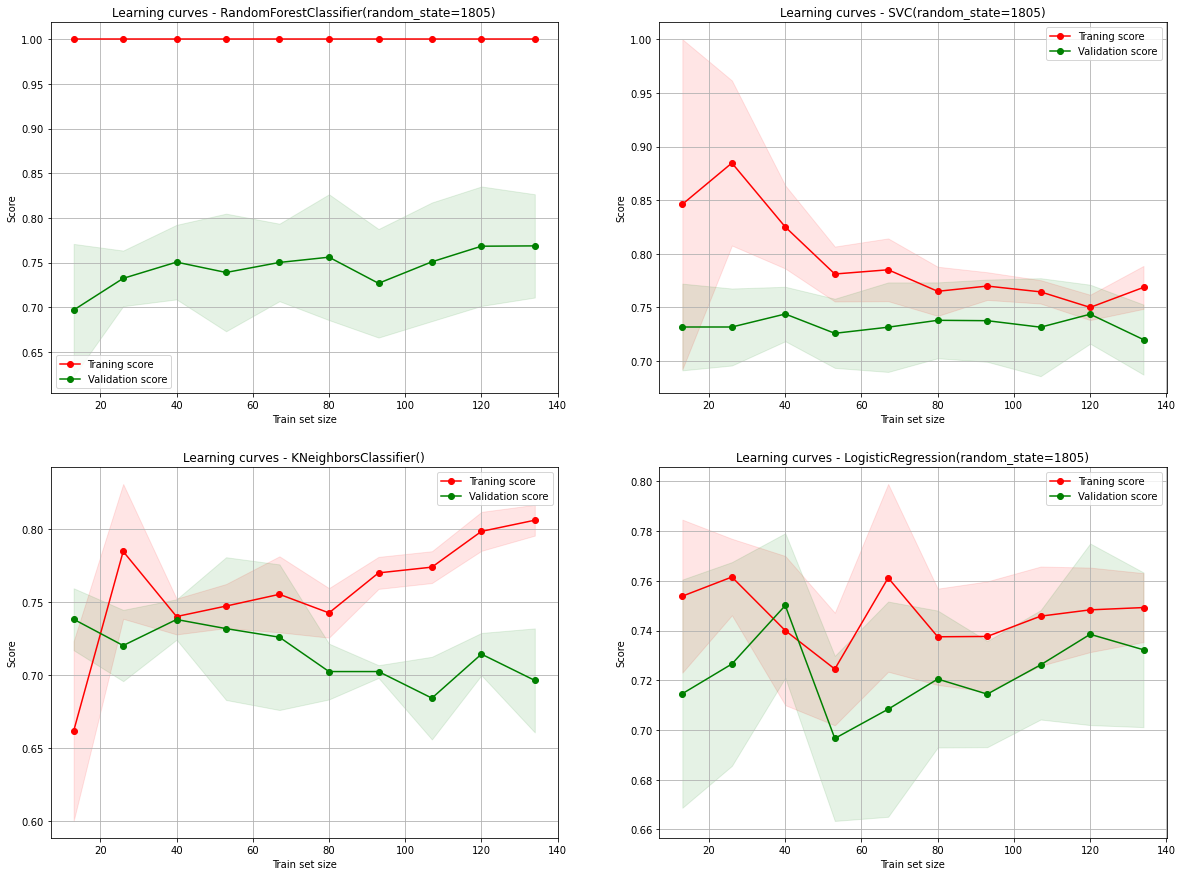

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.93,0.70,0.13,-0.24,Overfitting :0.25,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}",0.74,0.70,0.24,-0.18,Overfitting :0.05,not complexe enough
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.80,0.74,0.27,-0.11,Overfitting :0.08,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.75,0.79,0.40,0.02,Underfitting :-0.05,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,14
1.0,9,12


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.47      0.36      0.41        22
         1.0       0.46      0.57      0.51        21

    accuracy                           0.47        43
   macro avg       0.47      0.47      0.46        43
weighted avg       0.47      0.47      0.46        43

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,17,5
1.0,12,9


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.59      0.77      0.67        22
         1.0       0.64      0.43      0.51        21

    accuracy                           0.60        43
   macro avg       0.61      0.60      0.59        43
weighted avg       0.61      0.60      0.59        43

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,16,6
1.0,10,11


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67        22
         1.0       0.65      0.52      0.58        21

    accuracy                           0.63        43
   macro avg       0.63      0.63      0.62        43
weighted avg       0.63      0.63      0.62        43

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,7
1.0,10,11


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64        22
         1.0       0.61      0.52      0.56        21

    accuracy                           0.60        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.61      0.60      0.60        43

************************************



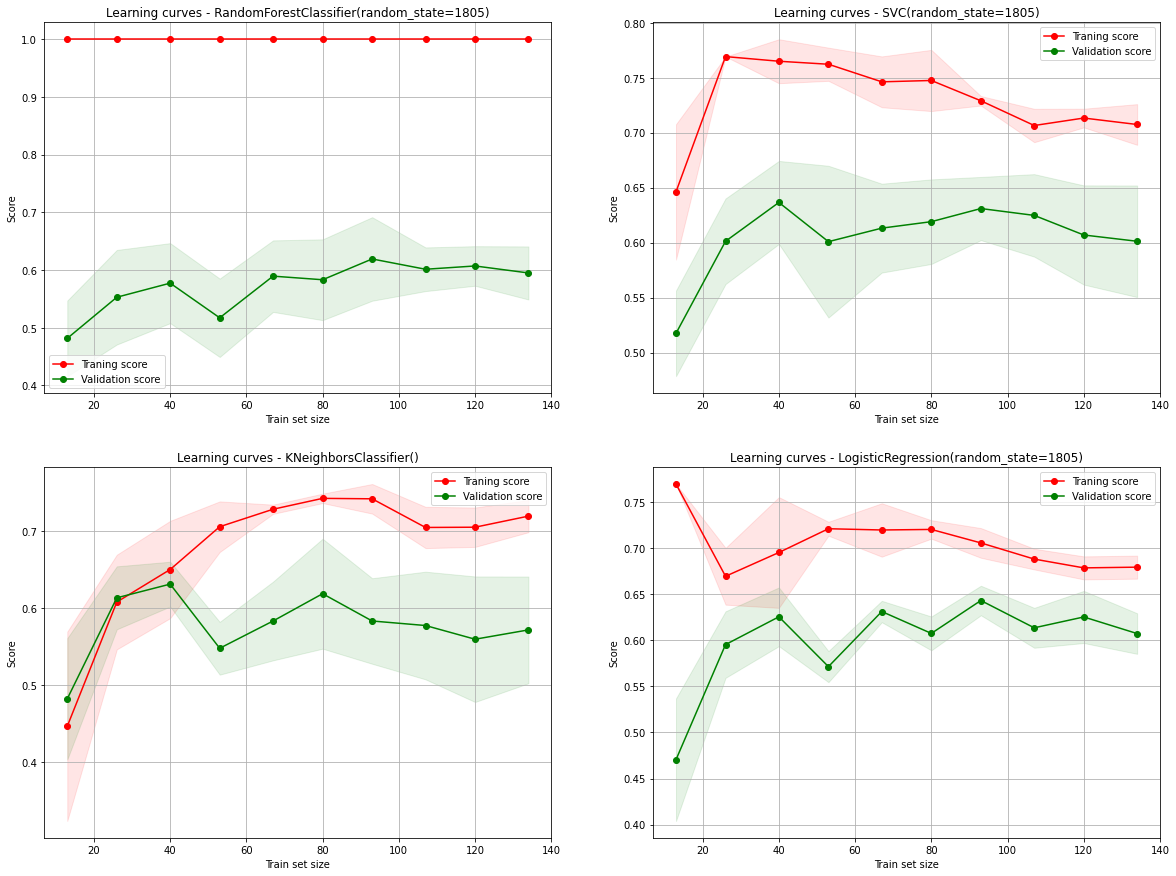

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.92,0.47,0.51,-0.40,Overfitting :0.49,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.65,0.60,0.51,-0.15,Overfitting :0.08,too much complex
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.67,0.63,0.58,-0.09,Overfitting :0.06,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.67,0.60,0.56,-0.14,Overfitting :0.1,too much complex


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,12
1.0,7,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49        21
         1.0       0.56      0.68      0.61        22

    accuracy                           0.56        43
   macro avg       0.56      0.56      0.55        43
weighted avg       0.56      0.56      0.55        43

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,13
1.0,6,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.38      0.46        21
         1.0       0.55      0.73      0.63        22

    accuracy                           0.56        43
   macro avg       0.56      0.55      0.54        43
weighted avg       0.56      0.56      0.54        43

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,12
1.0,6,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50        21
         1.0       0.57      0.73      0.64        22

    accuracy                           0.58        43
   macro avg       0.59      0.58      0.57        43
weighted avg       0.59      0.58      0.57        43

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,13
1.0,6,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.38      0.46        21
         1.0       0.55      0.73      0.63        22

    accuracy                           0.56        43
   macro avg       0.56      0.55      0.54        43
weighted avg       0.56      0.56      0.54        43

************************************



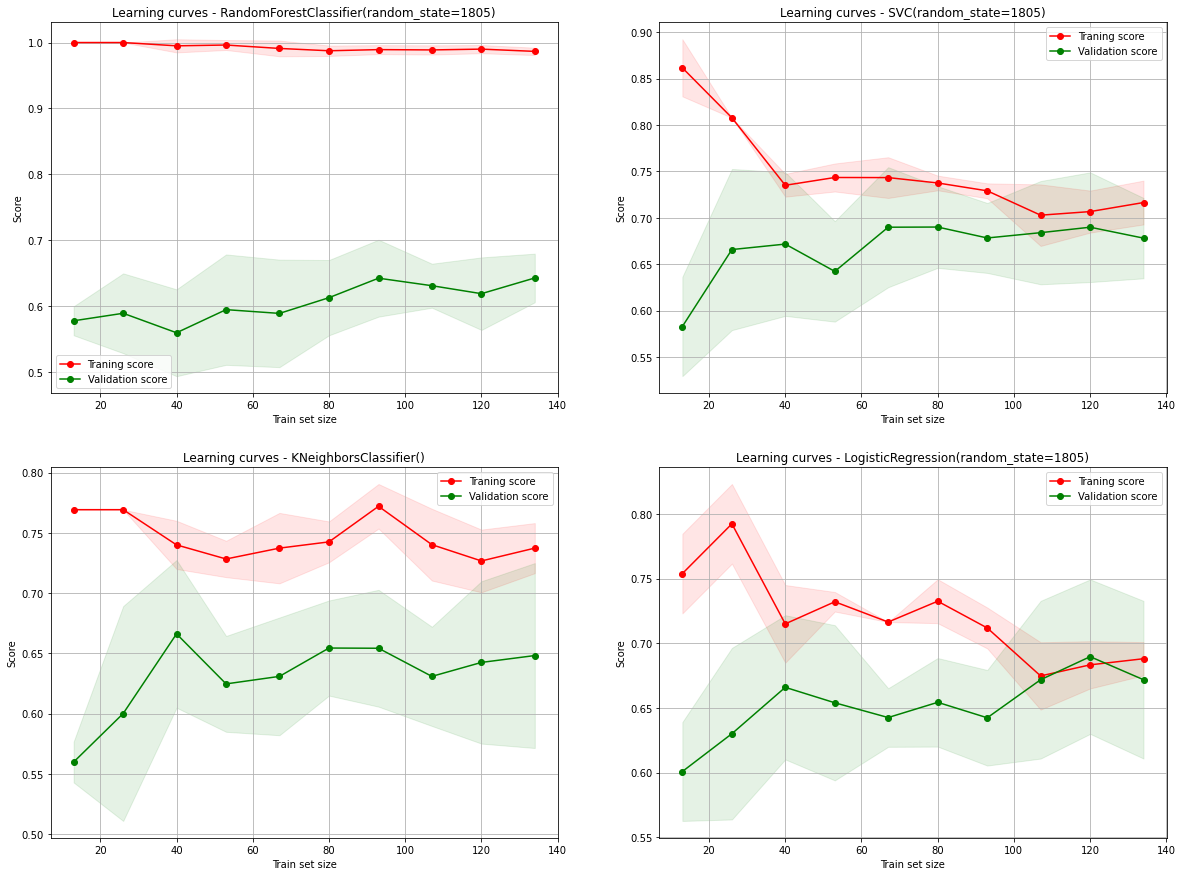

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.92,0.56,0.61,-0.24,Overfitting :0.39,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.70,0.56,0.63,-0.25,Overfitting :0.2,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.68,0.58,0.64,-0.20,Overfitting :0.15,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.68,0.56,0.63,-0.25,Overfitting :0.18,too much complex


In [15]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [16]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=1000)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,186,14
1.0,3,197


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       200
         1.0       0.93      0.98      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,199,1
1.0,0,200


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       200
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,197,3
1.0,7,193


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       200
         1.0       0.98      0.96      0.97       200

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,133,67
1.0,40,160


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.71       200
         1.0       0.70      0.80      0.75       200

    accuracy                           0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400

************************************



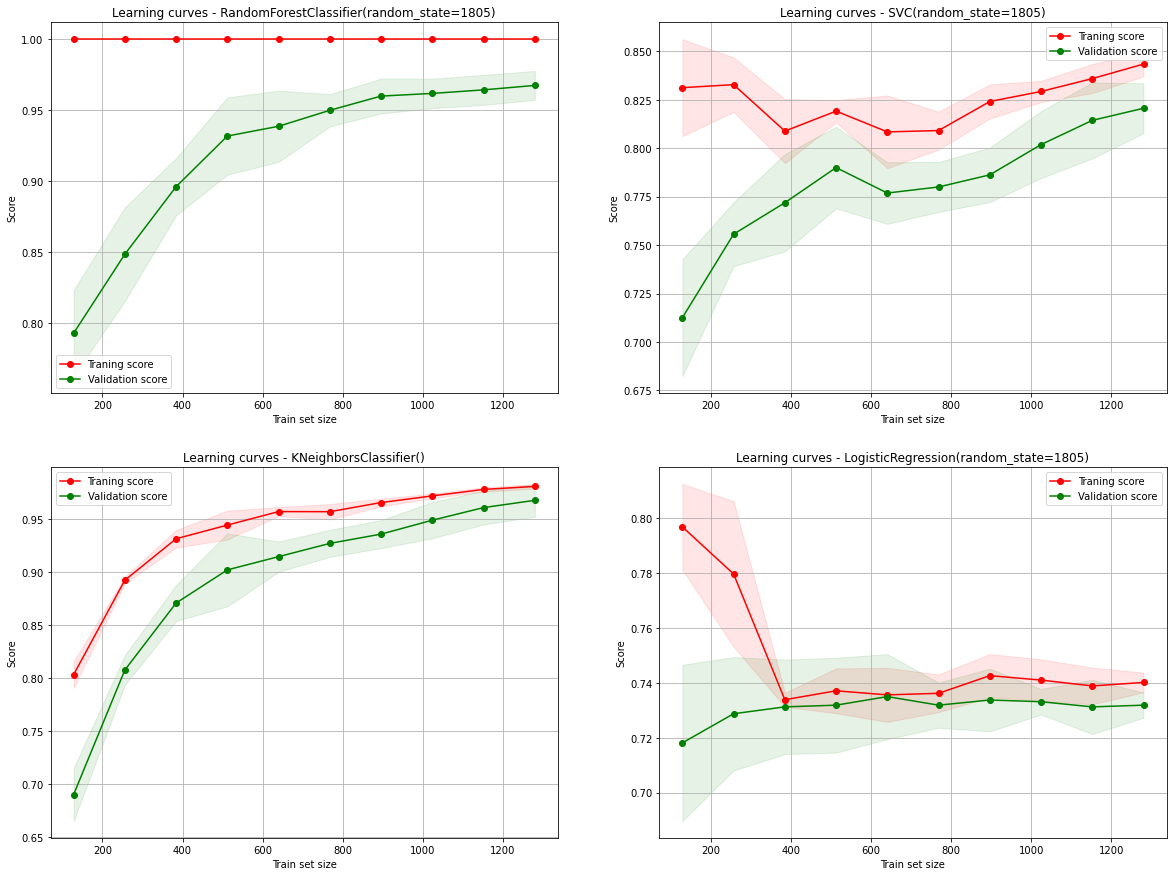

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.0,0.96,0.96,0.84,Overfitting :0.04,not complexe enough
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",1.0,1.00,1.00,0.99,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.0,0.98,0.97,0.90,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.8,0.73,0.75,0.15,Overfitting :0.09,too much complex


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,193,7
1.0,9,191


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       200
         1.0       0.96      0.95      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,197,3
1.0,3,197


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       200
         1.0       0.98      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,192,8
1.0,6,194


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       200
         1.0       0.96      0.97      0.97       200

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,133,67
1.0,51,149


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69       200
         1.0       0.69      0.74      0.72       200

    accuracy                           0.70       400
   macro avg       0.71      0.71      0.70       400
weighted avg       0.71      0.70      0.70       400

************************************



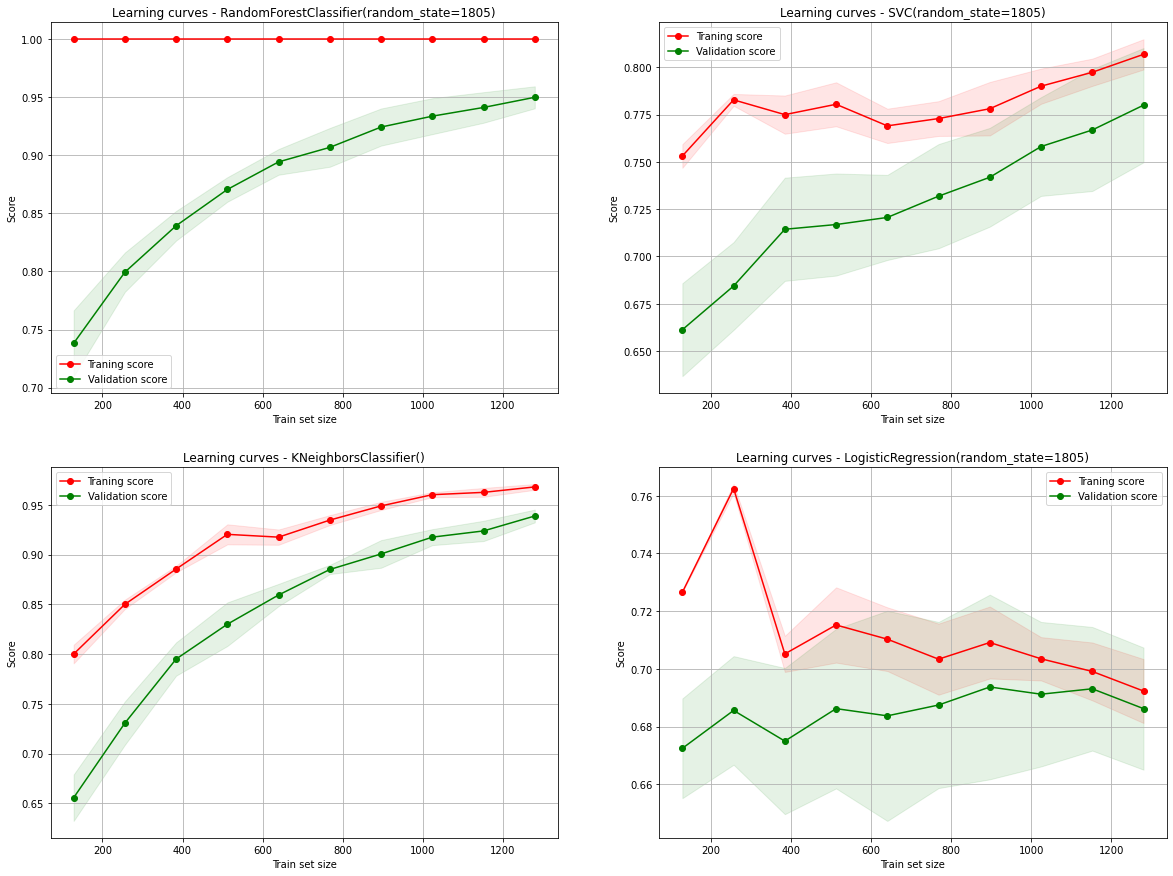

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.0,0.96,0.96,0.85,Overfitting :0.04,not complexe enough
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",1.0,0.98,0.98,0.94,Overfitting :0.02,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",1.0,0.96,0.97,0.86,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.7,0.70,0.72,0.09,Overfitting :0.0,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,137,59
1.0,48,156


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       196
         1.0       0.73      0.76      0.74       204

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,139,57
1.0,53,151


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       196
         1.0       0.73      0.74      0.73       204

    accuracy                           0.73       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,139,57
1.0,50,154


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       196
         1.0       0.73      0.75      0.74       204

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,114,82
1.0,51,153


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       196
         1.0       0.65      0.75      0.70       204

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400

************************************



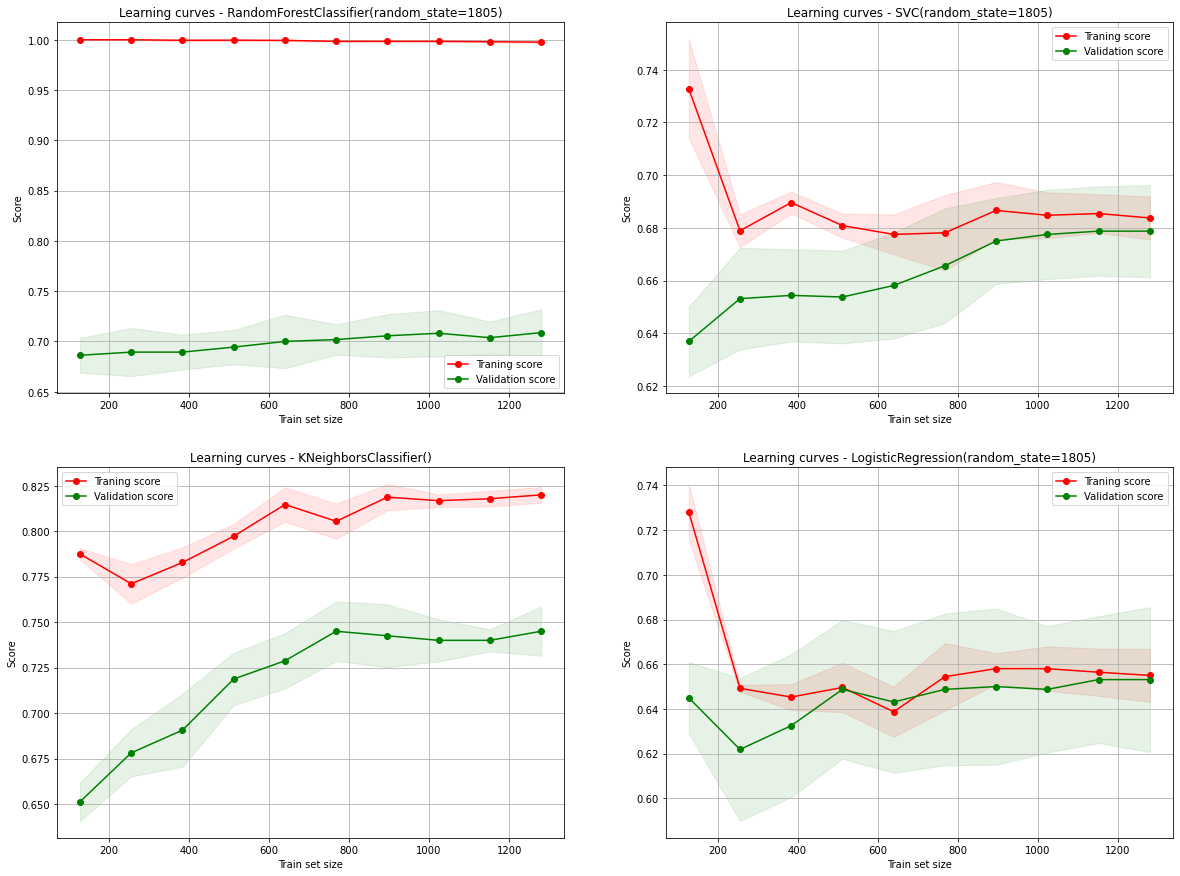

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.88,0.73,0.74,0.15,Overfitting :0.17,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.73,0.72,0.73,0.14,Overfitting :0.01,not complexe enough
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.83,0.73,0.74,0.16,Overfitting :0.12,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.65,0.67,0.70,-0.00,Underfitting :-0.03,not complexe enough


In [18]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [19]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [20]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.137,0.059,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.499,0.584,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.137,0.059,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.499,0.584,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
TOQ (Coll a/o ILC),0.009,0.211,0.392,0.321,0.025,0.505,0.084,0.217,0.607,0.626,0.175,0.083,0.51,0.15,0.186,0.083,0.171,0.96,0.631,0.593,0.31,0.275,0.576,0.707,0.607,0.721,0.547,0.279,0.324,0.455,0.125,0.645,0.924,0.921,0.87,0.946,0.818,0.56,0.634,0.575,0.572,0.232,0.508,0.588,0.622,0.783,0.544,0.199,0.237,0.163,0.179,0.3,0.057,0.637,0.643,0.743,0.618,0.295,0.273,0.292,0.182,0.105,0.3,0.479,0.27,0.4,0.208,0.097,0.123,0.087,0.06,0.558,0.966,0.495,0.027,0.009,0.211,0.392,0.321,0.025,0.505,0.084,0.217,0.607,0.626,0.175,0.083,0.51,0.15,0.186,0.083,0.171,0.96,0.631,0.593,0.31,0.275,0.576,0.707,0.607,0.721,0.547,0.279,0.324,0.455,0.125,0.645,0.924,0.921,0.87,0.946,0.818,0.56,0.634,0.575,0.572,0.232,0.508,0.588,0.622,0.783,0.544,0.199,0.237,0.163,0.179,0.3,0.057,0.637,0.643,0.743,0.618,0.295,0.273,0.292,0.182,0.105,0.3,0.479,0.27,0.4,0.208,0.097,0.123,0.087,0.06,0.558,0.966,0.495,0.027


In [21]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
Age,0.009
Age,0.009
NDRT duration (s),0.025
NDRT duration (s),0.025
FRONTAL THETA/BETA,0.027
FRONTAL THETA/BETA,0.027
Pz DELTA 1-4Hz,0.057
Pz DELTA 1-4Hz,0.057
Oz GAMMA 30-50Hz,0.06
Oz GAMMA 30-50Hz,0.06


In [22]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,Age,FRONTAL THETA/BETA,NDRT duration (s)_224,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_1265
1,0.028571,0.432272,0,0,1,0
2,0.028571,0.425026,1,0,0,0
8,0.028571,0.368963,0,1,0,0
9,0.028571,0.420859,0,0,0,1
15,0.171429,0.529449,0,0,1,0
16,0.171429,0.534040,1,0,0,0
17,0.171429,0.496233,0,1,0,0
18,0.171429,1.000000,0,0,0,1
24,0.016327,0.409029,1,0,0,0
25,0.016327,0.391270,0,0,1,0


In [23]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************

SVC
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,7
1.0,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.70      1.00      0.82        16

    accuracy                           0.70        23
   macro avg       0.35      0.50      0.41        23
weighted avg       0.48      0.70      0.57        23

************************************



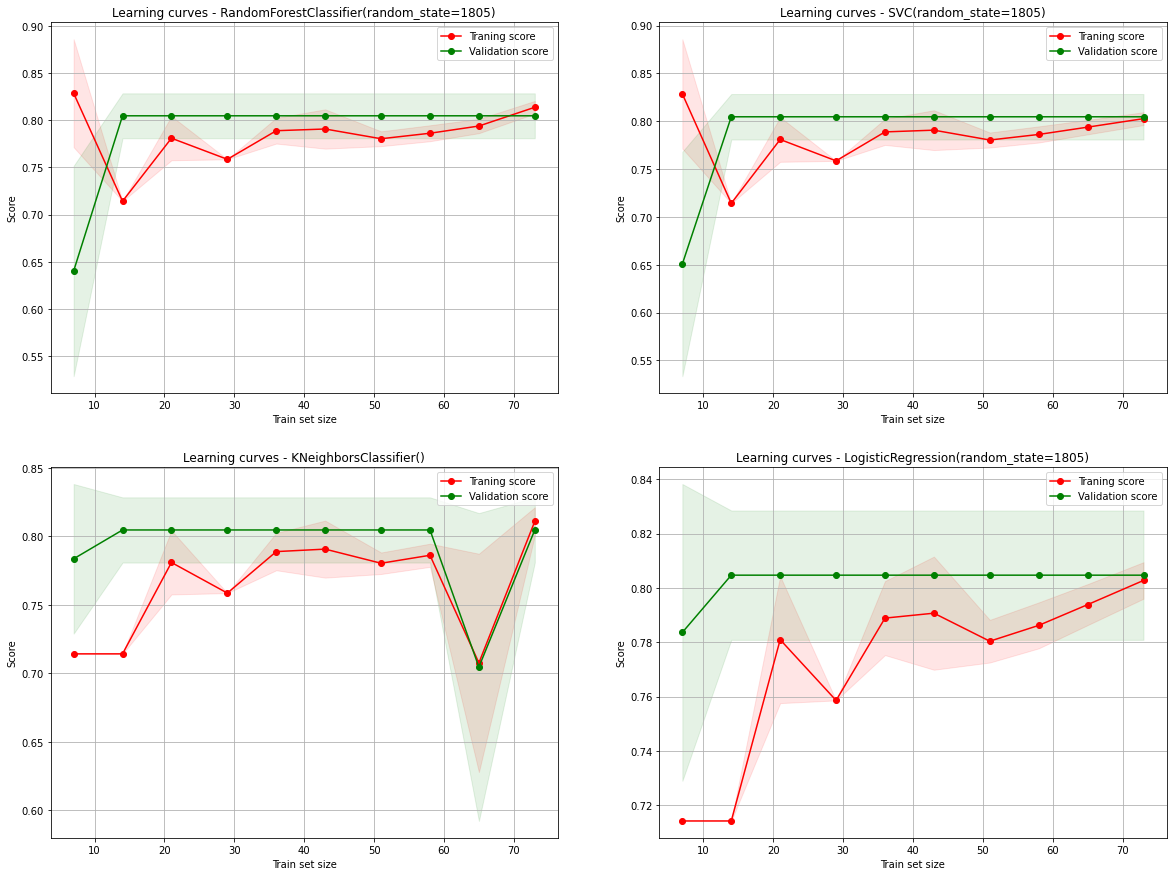

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.82,0.7,0.82,-0.3,Overfitting :0.15,too much complex
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.80,0.7,0.82,-0.3,Overfitting :0.13,too much complex
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.80,0.7,0.82,-0.3,Overfitting :0.13,too much complex
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.80,0.7,0.82,-0.3,Overfitting :0.13,too much complex


In [24]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [25]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [27]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      Age  FRONTAL THETA/BETA  NDRT duration (s)_224  NDRT duration (s)_322  \
 0      0                   0                      0                      0   
 1      0                   0                      1                      0   
 2      0                   0                      0                      1   
 3      0                   0                      0                      0   
 4      0                   0                      0                      0   
 ..   ...                 ...                    ...                    ...   
 395    0                   0                      0                      0   
 396    0                   0                      1                      0   
 397    0                   0                      0                      1   
 398    0                   0                      0                      0   
 399    0                   0                      0                      0   
 
      NDRT duration (s)_351

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,34,4
1.0,21,21


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73        38
         1.0       0.84      0.50      0.63        42

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.73      0.69      0.68        80

************************************



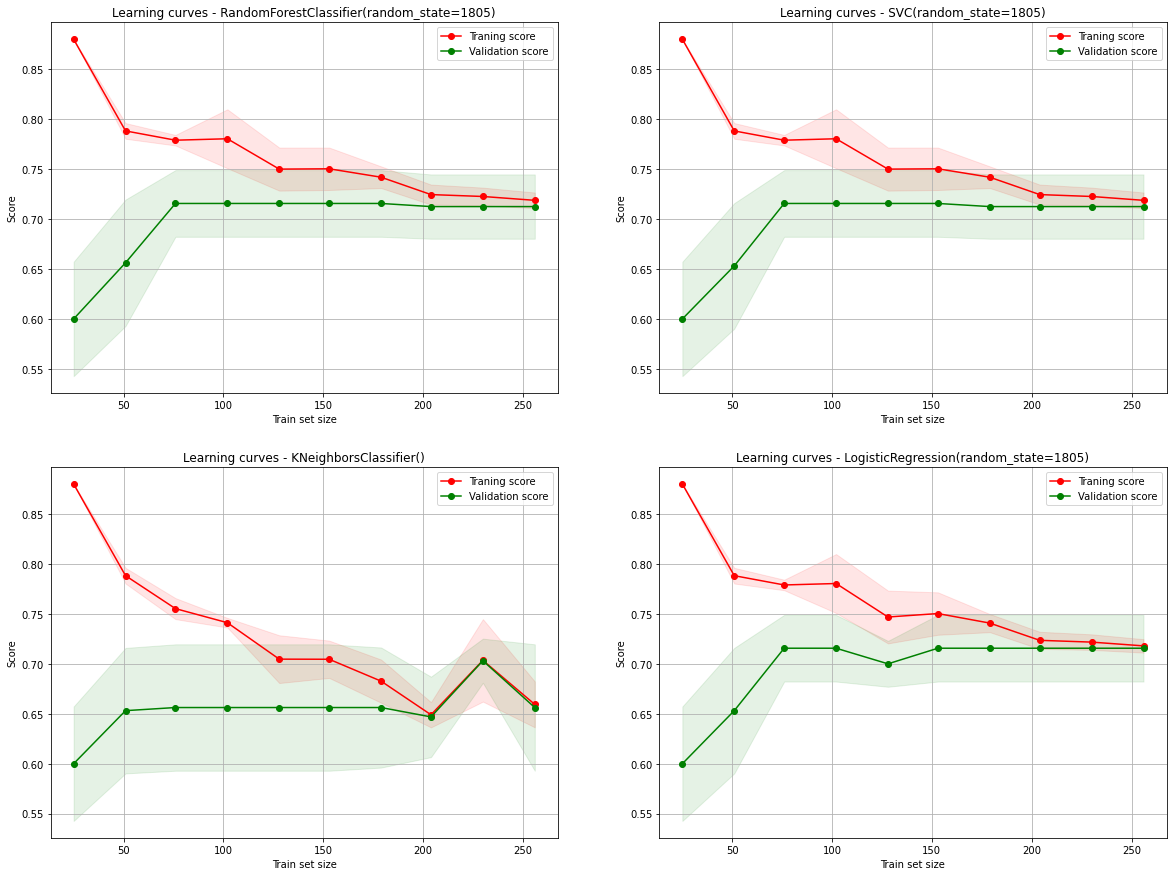

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.72,0.69,0.63,0.03,Overfitting :0.04,not complexe enough


In [28]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [29]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [30]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,FRONTAL THETA/BETA,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.414017,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.432272,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.425026,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.439017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.410870,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.575577,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
343,0.540931,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
344,0.352224,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
345,0.541869,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
list(X_TOT_reduced.values())[0]

,FRONTAL THETA/BETA,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.414017,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.432272,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.425026,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.439017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.410870,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.575577,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
343,0.540931,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
344,0.352224,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
345,0.541869,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,RRHRVMedian,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.124,0.742,0.048,0.229,0.026,0.106,0.265,0.836,0.512,0.585,0.404,0.728,0.604,0.539,0.79,0.729,0.376,0.404,0.106,0.106,0.24,0.467,0.731,0.574,0.403,0.438,0.381,0.453,0.513,0.394,0.457,0.884,0.856,0.89,0.906,0.975,0.86,0.865,0.998,0.821,0.818,0.681,0.871,0.715,0.57,0.636,0.526,0.628,0.699,0.607,0.738,0.728,0.568,0.959,0.73,0.786,0.713,0.95,0.835,0.887,0.62,0.389,0.663,0.435,0.315,0.327,0.309,0.335,0.381,0.322,0.411,0.528,0.868,0.519,0.041,0.124,0.742,0.048,0.229,0.026,0.106,0.265,0.836,0.512,0.585,0.404,0.728,0.604,0.539,0.79,0.729,0.376,0.404,0.106,0.106,0.24,0.467,0.731,0.574,0.403,0.438,0.381,0.453,0.513,0.394,0.457,0.884,0.856,0.89,0.906,0.975,0.86,0.865,0.998,0.821,0.818,0.681,0.871,0.715,0.57,0.636,0.526,0.628,0.699,0.607,0.738,0.728,0.568,0.959,0.73,0.786,0.713,0.95,0.835,0.887,0.62,0.389,0.663,0.435,0.315,0.327,0.309,0.335,0.381,0.322,0.411,0.528,0.868,0.519,0.041


In [33]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
NDRT duration (s),0.026
NDRT duration (s),0.026
FRONTAL THETA/BETA,0.041
FRONTAL THETA/BETA,0.041
ID Event,0.048
ID Event,0.048
NDRT solicitation hands,0.106
LF,0.106
HF,0.106
NDRT solicitation hands,0.106


TOT (s)



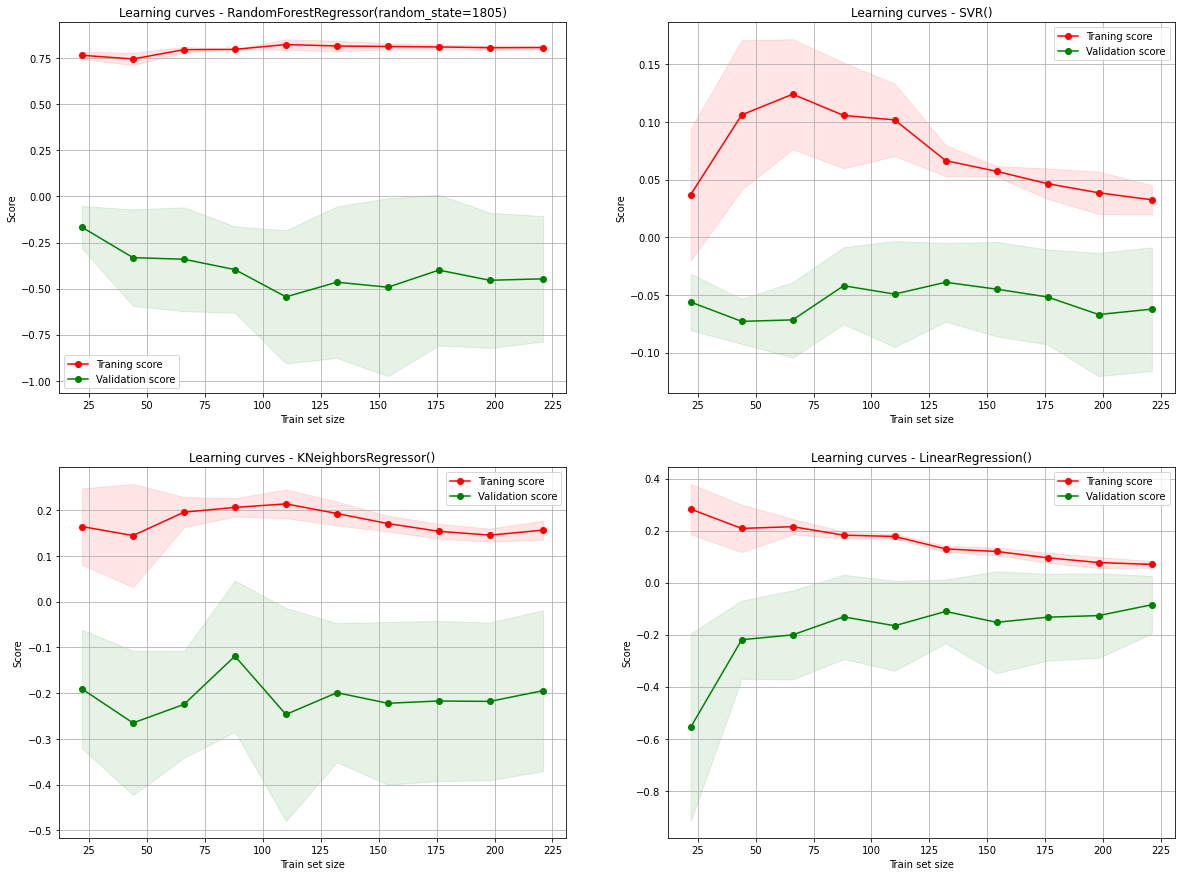

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.30,-0.07,0.068,0.152,0.261,0.152,Overfitting :1.23,too much complex
1,TOT (s),SVR,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",-0.00,-0.08,0.069,0.147,0.263,0.147,Underfitting :-inf,too much complex
2,TOT (s),KNN Regressor,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.06,-0.09,0.070,0.157,0.264,0.157,Overfitting :2.5,too much complex
3,TOT (s),Linear Regression,{},0.05,-0.10,0.070,0.158,0.264,0.158,Overfitting :3.0,too much complex


In [34]:
predict(X_TOT_encoded,y_TOT, method = 'regression')